In [36]:
# Importing all libraries and dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Loading and Encoding the Dataset

df= pd.read_csv("spam.csv", encoding= 'ISO-8859-1', encoding_errors = 'strict')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
# Cleaning the Dataset

df=df.drop(df.columns[[2,3,4]], axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Renaming the Columns

df.rename(columns={'v1': 'Labels', 'v2': 'Texts'}, inplace=True)

In [9]:
df.head()

,Labels,Texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.Texts[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [11]:
df['Texts'] = df['Texts'].apply(lambda x: ' '.join(re.findall(r'[A-Za-z0-9]+', str(x))))

In [12]:
df['Texts'][0]

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [13]:
df.Labels=df.Labels.apply(lambda x: 1 if x=="spam" else 0)

In [14]:
df.head()

,Labels,Texts
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I don t think he goes to usf he lives arou...


In [40]:
# Label data are converted into a decimal number using lambda.

df.Labels=df.Labels.apply(lambda x: 1 if x=="spam" else 0)

In [41]:
df.head()

,Labels,Texts
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I don t think he goes to usf he lives arou...


In [15]:
# DATA VISUALIZATION

le = LabelEncoder()
df["Labels"] = le.fit_transform(df["Labels"])

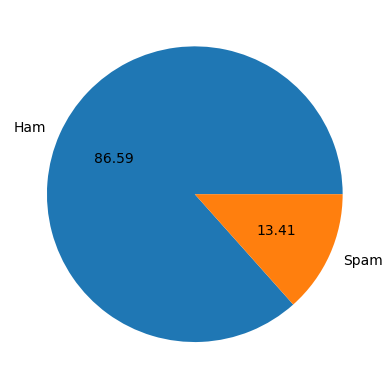

In [17]:
plt.pie(df["Labels"].value_counts(),autopct = "%.2f", labels=['Ham','Spam'])
plt.show()

In [18]:
# TRAINING AND SPLITTING THE DATA
# Data is divied into training and testing dataset.

X_train, X_test, y_train, y_test=train_test_split(df.Texts, df.Labels, test_size=0.2)

In [19]:
X_train.shape

(4457,)

In [20]:
# CountVectorization for text transfrom 

cv=CountVectorizer()

In [21]:
X_train_cv= cv.fit_transform(X_train.values)

In [22]:
X_train

2119                 I hope you know I m still mad at you
3050    Awesome question with a cute answer Someone as...
2093    Final Chance Claim ur 150 worth of discount vo...
4143       That s a shame Maybe cld meet for few hrs tomo
1141    I don t know u and u don t know me Send CHAT t...
                              ...                        
4397    Can you tell Shola to please go to college of ...
1084    For me the love should start with attraction i...
3967    Did u turn on the heater The heater was on and...
1884             I love your ass Do you enjoy doggy style
4095           Hey is rite u put 10 evey mnth is that all
Name: Texts, Length: 4457, dtype: object

In [23]:
# Sparse Matrix

X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
X_train_cv.shape

(4457, 7737)

In [25]:
cv.get_feature_names_out()[2000:2100]

array(['consider', 'considering', 'consistently', 'console', 'constant',
       'constantly', 'contact', 'contacted', 'contacts', 'contains',
       'content', 'contented', 'contention', 'contents', 'continent',
       'continue', 'continued', 'contract', 'contribute', 'control',
       'convenience', 'conversations', 'convey', 'conveying', 'convinced',
       'convincing', 'cook', 'cooked', 'cookies', 'cooking', 'cool',
       'cooperative', 'copies', 'coping', 'cops', 'copy', 'corect',
       'cornwall', 'corrct', 'correct', 'correction', 'correctly',
       'corrupt', 'cos', 'cosign', 'cost', 'costa', 'costing', 'costs',
       'costume', 'costumes', 'couch', 'cougar', 'cough', 'coughing',
       'could', 'coulda', 'couldn', 'count', 'countinlots', 'country',
       'counts', 'coupla', 'couple', 'courage', 'courageous', 'course',
       'court', 'cousin', 'cover', 'coveragd', 'covers', 'coz', 'cozy',
       'cps', 'cr', 'cr01327bt', 'cr9', 'crab', 'crack', 'cramps', 'crap',
       '

In [26]:
X_train_np=X_train_cv.toarray()

In [27]:
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
X_train[:7]

2119                 I hope you know I m still mad at you
3050    Awesome question with a cute answer Someone as...
2093    Final Chance Claim ur 150 worth of discount vo...
4143       That s a shame Maybe cld meet for few hrs tomo
1141    I don t know u and u don t know me Send CHAT t...
4146    Pls help me tell sura that i m expecting a bat...
5043    Dunno my dad said he coming home 2 bring us ou...
Name: Texts, dtype: object

In [29]:
np.where(X_train_np[2925]!=0)

(array([1790, 6065, 6856, 7454], dtype=int64),)

In [30]:
X_train_np[2925][1661]

0

In [31]:
# USING NAIVE BAYES CLASSIFIER FOR PREDICTION

NB=MultinomialNB()

In [32]:
NB.fit(X_train_cv, y_train)

MultinomialNB()

In [33]:
X_test_cv= cv.transform(X_test)

In [34]:
y_pred=NB.predict(X_test_cv)

In [37]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.93      0.93      0.93       131

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [43]:
print(accuracy_score(y_test, y_pred))

0.9838565022421525
